<a href="https://colab.research.google.com/github/TRIGON69/ISTE/blob/main/ISTEQ1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os #

import numpy as np

import pandas as pd

from matplotlib import pyplot
%matplotlib inline
%matplotlib notebook

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Titanic_ISTE.csv to Titanic_ISTE.csv


In [42]:

import io
data = pd.read_csv(io.BytesIO(uploaded['Titanic_ISTE.csv']))

data=data.dropna(subset=["Age","Fare","Pclass","Sex","SibSp","Parch","Survived"])
data['Sex'] = data['Sex'].map({'male': 0,'female': 1})
X, y = data.iloc[:,[ 2,4,5,6,7,9]], data.iloc[:, 1]

X=X.values
y=y.values
print(X)

[[ 3.      0.     22.      1.      0.      7.25  ]
 [ 1.      1.     38.      1.      0.     71.2833]
 [ 3.      1.     26.      0.      0.      7.925 ]
 ...
 [ 1.      1.     19.      0.      0.     30.    ]
 [ 1.      0.     26.      0.      0.     30.    ]
 [ 3.      0.     32.      0.      0.      7.75  ]]


In [51]:
def sigmoid(z):
  return 1 / (1 + np.exp(-z))

   

In [45]:

m, n = X.shape  

X = np.concatenate([np.ones((m, 1)), X], axis=1)  #add column of ones
print(X)

[[ 1.      3.      0.     ...  1.      0.      7.25  ]
 [ 1.      1.      1.     ...  1.      0.     71.2833]
 [ 1.      3.      1.     ...  0.      0.      7.925 ]
 ...
 [ 1.      1.      1.     ...  0.      0.     30.    ]
 [ 1.      1.      0.     ...  0.      0.     30.    ]
 [ 1.      3.      0.     ...  0.      0.      7.75  ]]


In [70]:
def model(X, Y, lr, iters):
    
    m ,n =X.shape
    
    theta = np.zeros((n,1))
    c = 0
    
    clist = []
    
    for i in range(iters):
        
        Z = theta.T.dot(X.T) + c
        h = sigmoid(Z)
        
        #cost function for logistic regression 
        costf = -(1/m)*np.sum( Y*np.log(h) + (1-Y)*np.log(1-h)) 
        
        # Gradient Descent
        dtheta = (1/m)*np.dot(h-Y, X)
        dc = (1/m)*np.sum(h-Y)
        
        theta = theta - lr*dtheta.T
        c = c - lr*dc
        
        # Keeping track of our cost function value
        clist.append(costf)
        
        if(i%(iters/10) == 0):
            print("cost after ", i, "iteration is : ", costf)
        
    return theta, c, clist
        

In [71]:
iterations = 100000
learningrate = 0.0015
theta, c, clist = model(X,y, learningrate, iterations)

cost after  0 iteration is :  0.6931471805599453
cost after  10000 iteration is :  0.5007991941243025
cost after  20000 iteration is :  0.47122170215611336
cost after  30000 iteration is :  0.460881268105181
cost after  40000 iteration is :  0.4562980022254881
cost after  50000 iteration is :  0.45381193841371187
cost after  60000 iteration is :  0.4522444476399952
cost after  70000 iteration is :  0.45115678963870764
cost after  80000 iteration is :  0.45036006586806404
cost after  90000 iteration is :  0.4497594656183268


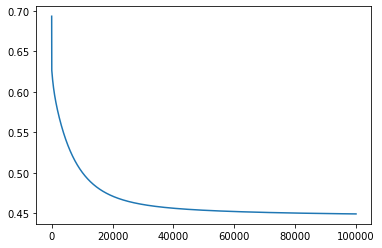

In [62]:
pyplot.plot(np.arange(iterations), clist)
pyplot.show()

In [69]:
prob = sigmoid(np.dot([1,2,1, 22,1,0, 13],theta ))
print(prob)
print(np.round(prob))

[0.59404885]
[1.]
